In [1]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 
from visualizer import *
#######################################################
current_dir = os.path.join('../../logs/', 'Cora_disjoint')
print('current_dir:', current_dir)
def create_info(name, logs, viz):
    return {'name': name, 'viz': viz,
        'logs': [os.path.join(current_dir, path) for path in logs]}
#######################################################
%matplotlib inline

current_dir: ../../logs/Cora_disjoint


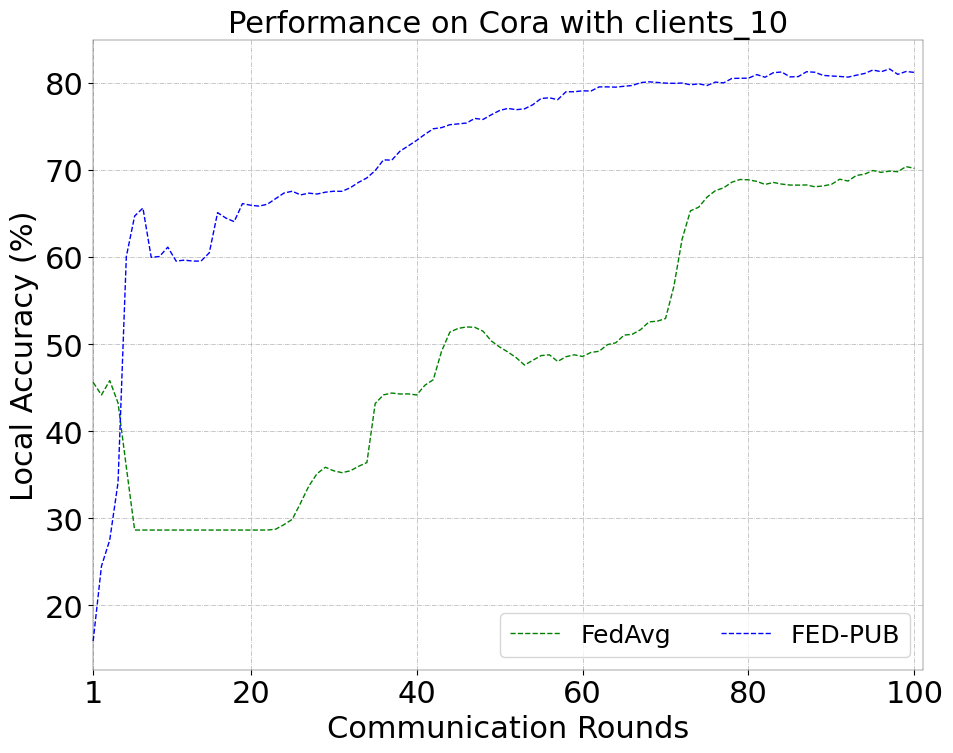

,model,Rnd @ Acc 80,Acc @ Rnd 100,Acc @ Best Val,Std @ Best Val,Acc @ Best Val All,Std @ Best Val All,Processed Rnds
0,FedAvg,N/A,70.16,70.16,0.0,70.16,0.0,100
1,FED-PUB,67,81.18,80.84,0.0,80.84,0.0,100


In [2]:
clients = 'clients_10'
upto = 100
target_acc = 80
interval_rnd = 20
models = [
    create_info(
        name='FedAvg', 
        logs=[
            f'{clients}/20230702_123200_fedavg',
        ],
        viz={'color':'green', 'linewidth': 1, 'linestyle': '--', 'marker': 'o', 'markevery':interval_rnd, 'markersize':0}),
    create_info(
        name='FED-PUB', 
        logs=[
            f'{clients}/20230702_125143_fedpub',
        ],
        viz={'color':'blue', 'linewidth': 1, 'linestyle': '--', 'marker': 'P', 'markevery':interval_rnd, 'markersize':0}),
]

plot_acc_over_round(models=models, upto=upto, opt={
    'plt_font_size': 22,
    'plt_line_width': 0.25,
    'plt_fig_size': (10,8),
    'plt_title': f'Performance on Cora with {clients}',
    'plt_y_label': 'Local Accuracy (%)',
    'plt_x_label': 'Communication Rounds',
    'plt_x_interval': interval_rnd,
    'plt_background_grid': True,
    'plt_legend_opt': {'ncol':2, 'fontsize': 18, 'loc': 'lower right'},
    'plt_save': f'./plots/cora_{clients}.png'
})

summary(
    models = models,
    upto = upto,
    target_acc = target_acc,
    target_rnd = upto
)
